# Supervised Learning [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) [sklearn]

Until now, we have explored supervised learning models from one family of algorithms. Linear models, Perceptrons, and Multi-Layer Perceptrons are all part of the same family of algorithms. They are based on similar principles: they learn from the data by adjusting the weights of the features. In the next notebooks, we will explore a different family of algorithms, those based on decision trees.

Decision trees are a popular family of algorithms because they are easy to understand and interpret. For instance, they can  be visualized in an intuitive way. They are also very versatile, capable of solving complex problems. Decision trees are also the building blocks of more complex algorithms like Random Forests, Gradient Boosting, and XGBoost.

### Advantages of a Decision Tree
------------------------------------------------------------
- Very fast to train
- Easy to understand a trained model (explainable machine learning)
- Can deal with both numerical and categorical data

### Disadvantages of a Decision Tree
------------------------------------------------------------
- Overly complex trees may overfit the data, depending on
- Small deviations in data can lead to completely different models / trees

### The parameters of a Decision Tree include
------------------------------------------------------------
- Max depth of tree (low values may overfit data, high values may underfit data)
- Minimum samples in a leaf node ( low values may overfit data, high values may underfit data)

Decision Trees work with logical rules. They split the data into subsets based on the values of the features. The goal is to create subsets that are as pure as possible. A subset is pure if all the samples in it belong to the same class. The purity of a subset is measured by mathematical measures, like the Gini impurity or the entropy. The goal of the algorithm is to minimize the impurity of the subsets. By doing so, the algorithm creates a tree that can be used to make predictions. The tree organizes the logical rules in a hierarchical way. Each decision rule form a so-called `node` in the tree. The rules at the top of the tree are the most general, while the rules at the bottom are the most specific. Below we can see and example of a decision tree that predicts if we should play badminton or not.

![Decision Tree](play_badminton.png)

This tree has three nodes. The first node splits the data based on the weather (Sunny, Cloudy, Rainy), the second node splits the data based on the humidity (> 75% or <= 75%>), and the third node splits the data based on the wind (>20 or <= 20). The leaves of the tree contain the predictions. For instance, if the weather is sunny and the humidity is high, we should not play badminton.

Decision trees can be used both for classification and regression tasks. We will start with the regression task of predicting the price of a house based on its features.

## Using Decision Trees for Regression

First, we start by loading the dataset we prepared earlier and splitting it into a training and a testing set. The dataset we use is already preprocessed and cleaned in an earlier notebook. As such, we can now focus on training a model.

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

house_prices_df = pd.read_csv(os.path.join(data_directory, "house-prices/train_preprocessed.csv"), sep= ",")
house_prices_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.883333     0.12250    0.125089         0.0  ...             0.0   
1      0.433333     0.00000    0.173281         0.0  ...             0.0   
2      0.866667     0.10125    0.086109         0.0  ...             0.0   
3      0.333333     0.00000    0.038271         0.0  ...             0.0   
4      0.833333     0.21875    0.116052         0.0  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 287 columns]

### Get the Labels 

After the loading the data, we first get the labels of the data. The labels are the target values that we want to predict. In this case, the labels are the prices of the houses. We store the labels in a variable called `y_true`. This variable contains the "ground truth", or the true house price value, values that we want to predict. By comparing the predicted values of the model to the true values, we can evaluate the performance of the model.

In [2]:
y_true = house_prices_df["SalePrice"]
y_true.shape

(1460,)

### Get the Labels 

After the loading the data, we first get the labels of the data. The labels are the target values that we want to predict. In this case, the labels are the prices of the houses. We store the labels in a variable called `y_true`. This variable contains the "ground truth", or the true house price value, values that we want to predict. By comparing the predicted values of the model to the true values, we can evaluate the performance of the model.

In [3]:
house_train_df = house_prices_df.copy().drop(columns = ["SalePrice"])
house_train_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.883333     0.12250    0.125089         0.0  ...             0.0   
1      0.433333     0.00000    0.173281         0.0  ...             0.0   
2      0.866667     0.10125    0.086109         0.0  ...             0.0   
3      0.333333     0.00000    0.038271         0.0  ...             0.0   
4      0.833333     0.21875    0.116052         0.0  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 286 columns]

### Split the Data into training and testing data

To evaluate the performance of the model, we split the data into a training set and a testing set. The training set is used to train the model and the testing set is used to evaluate the performance of the model. To split the data, we use the `train_test_split` function from the `sklearn.model_selection` module. We use 80% of the data for training and 20% of the data for testing. We do this by setting the `test_size` parameter to 0.2. We can also set the `random_state` parameter to a fixed value to ensure that the data is split in the same way every time we run the code.

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df, y_train, y_test = train_test_split(house_train_df, y_true, test_size=0.2, random_state=42)

In [5]:
train_df.shape, y_train.shape, test_df.shape, y_test.shape

((1168, 286), (1168,), (292, 286), (292,))

### Train the Decision Tree Model

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(train_df, y_train)

DecisionTreeRegressor(max_depth=3)

#### Visualizing the Decision Tree

After training the model, we can visualize the decision tree using the `export_graphviz` function from the `sklearn.tree` module. This function takes the trained model and the feature names as input and plots the decision tree. The decision tree is a tree-like structure where each node represents a decision based on a feature and each leaf node represents the predicted value. The decision tree can be visualized in an intuitive way, making it easy to understand and interpret.

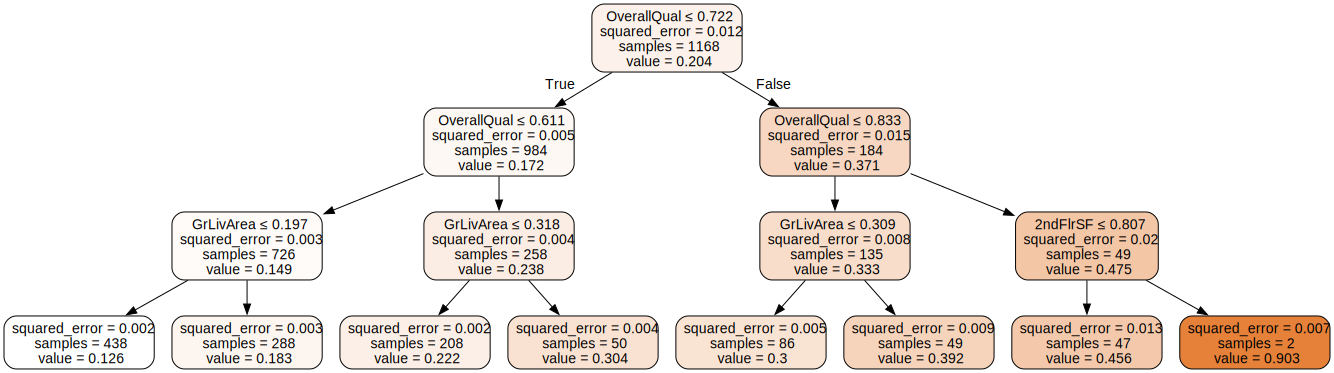

In [15]:
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(tree_regressor, 
                           feature_names=train_df.columns,
                           out_file=None, 
                           filled=True, 
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

Visualizing the tree actually explains the model in a very intuitive way. It shows how the model makes decisions based on the features of the data. For example, the first decision is based on the feature `OverallQual`. If the value of `OverallQual` is less than or equal to 0.722, the model goes to the left branch of the tree, otherwise it goes to the right branch. In the left branch, the model goes to the left branch if the `OverallQual` is less or equal to 0.611, otherwise to the right branch. This process continues until the model reaches a leaf node (the node at the bottom), where it makes a prediction. The value the model returns is the average price of the houses in that leaf node.

### Evaluate the Model

As before, we are using the `root mean squared error` to evaluate or model:

In [16]:
from sklearn.metrics import root_mean_squared_error

y_pred = tree_regressor.predict(test_df)
root_mean_squared_error(y_test, y_pred)

0.05731056326218622

We can see that a `DecisionTreeRegressor` has a `root mean squared error` that is a lot lower than a `LinearRegression` model. This is because a `DecisionTreeRegressor` is able to capture non-linear relationships in the data, while a `LinearRegression` model can only capture linear relationships. This makes a `DecisionTreeRegressor` a better choice for this dataset.

## Using Decision Trees for Classification

We will now use a Decision Tree on the Titanic dataset we used earlier. We will read the preprocessed data we used previously and split the data into a training and a testing set. We will then train a Decision Tree model on the training set and evaluate its performance on the testing set.

### Loading the data

In [ ]:
import pandas as pd 

titanic_df = pd.read_csv(os.path.join(data_directory, 'titanic/train_preprocessed.csv'))
titanic_df.head()

Age      Fare  Survived  Pclass_1  Pclass_2  Pclass_3  SibSp_0  \
0 -0.565736 -0.502445         0       0.0       0.0       1.0      0.0   
1  0.663861  0.786845         1       1.0       0.0       0.0      0.0   
2 -0.258337 -0.488854         1       0.0       0.0       1.0      1.0   
3  0.433312  0.420730         1       1.0       0.0       0.0      0.0   
4  0.433312 -0.486337         0       0.0       0.0       1.0      1.0   

   SibSp_1  SibSp_2  SibSp_3  ...  Parch_4  Parch_5  Parch_6  Sex_female  \
0      1.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   
1      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
2      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
3      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
4      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cabin_False  Cabin_True  
0       1.0         0.0         0.0         1.0          0.0         1.0  
1       0.0         1.0         0.0         0.0          1.0         0.0  
2       0.0         0.0         0.0         1.0          0.0         1.0  
3       0.0         0.0         0.0         1.0          1.0         0.0  
4       1.0         0.0         0.0         1.0          0.0         1.0  

[5 rows x 27 columns]

### Get the Labels 

After the loading the data, we first get the labels of the data. The labels are the target values that we want to predict. In this case, the labels show whether the passenger survived or not. We store the labels in a variable called `y_true`. This variable contains the "ground truth", or the true value, values that we want to predict. By comparing the predicted values of the model to the true values, we can evaluate the performance of the model.

In [22]:
y_true = titanic_df['Survived']
y_true.shape

(891,)

## Remove the Label Column

The second step is to remove the label column from the training data. The label column is the column that we want to predict and therefore cannot be used as a feature. If we do not remove the label column, the model will be able to perfectly predict the label, it could be as easy as returning the label column value. However, in this case, the model will not be able to generalize to new data. 

In [23]:
titanic_df = titanic_df.drop('Survived', axis=1)
titanic_df.head()

Age      Fare  Pclass_1  Pclass_2  Pclass_3  SibSp_0  SibSp_1  \
0 -0.565736 -0.502445       0.0       0.0       1.0      0.0      1.0   
1  0.663861  0.786845       1.0       0.0       0.0      0.0      1.0   
2 -0.258337 -0.488854       0.0       0.0       1.0      1.0      0.0   
3  0.433312  0.420730       1.0       0.0       0.0      0.0      1.0   
4  0.433312 -0.486337       0.0       0.0       1.0      1.0      0.0   

   SibSp_2  SibSp_3  SibSp_4  ...  Parch_4  Parch_5  Parch_6  Sex_female  \
0      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   
1      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
2      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
3      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
4      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cabin_False  Cabin_True  
0       1.0         0.0         0.0         1.0          0.0         1.0  
1       0.0         1.0         0.0         0.0          1.0         0.0  
2       0.0         0.0         0.0         1.0          0.0         1.0  
3       0.0         0.0         0.0         1.0          1.0         0.0  
4       1.0         0.0         0.0         1.0          0.0         1.0  

[5 rows x 26 columns]

## Split the Data into training and testing data

To evaluate the performance of the model, we split the data into a training set and a testing set. The training set is used to train the model and the testing set is used to evaluate the performance of the model. To split the data, we use the `train_test_split` function from the `sklearn.model_selection` module. We use 80% of the data for training and 20% of the data for testing. We do this by setting the `test_size` parameter to 0.2. We can also set the `random_state` parameter to a fixed value to ensure that the data is split in the same way every time we run the code.

In [24]:
from sklearn.model_selection import train_test_split

train_df, test_df, y_train, y_test = train_test_split(titanic_df, y_true, test_size=0.2, random_state=42)

### Train the Decision Tree Model

After splitting the data, we train a Decision Tree model on the training set. We use the `DecisionTreeClassifier` class from the `sklearn.tree` module to create the model. We then fit the model to the training data using the `fit` method. 

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
decision_tree.fit(train_df, y_train)

DecisionTreeClassifier(max_depth=2)

#### Visualize the decision tree

Also this decision tree we can visualize:

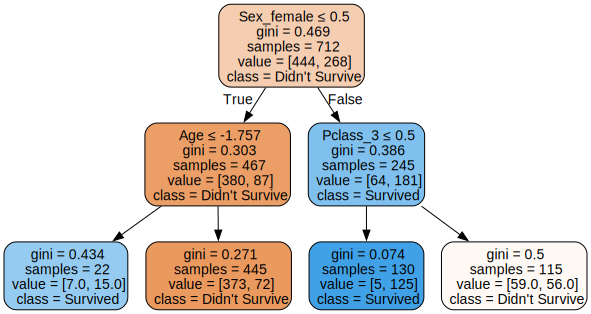

In [28]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                      feature_names=train_df.columns,
                      class_names=["Didn't Survive", "Survived"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In the visualization of the decision tree, we see that the gender, the age, and the class are the most important features for predicting whether a passenger survived or not. This decision tree for classification is also a bit easier to interpret than the decision tree for regression. The decision tree for classification shows the predicted target label directly, while the decision tree for regression shows the average value of the target variable in each leaf node.

### Evaluate the Model

After train the model, we can evaluate the model on the test set. We use the `predict` method to make predictions on the test set and then use the `classification_report` function from the `sklearn.metrics` package to evaluate the model performance.

In [27]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(test_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       105
           1       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179



# Conclusion

In this notebook, we explained what a `DecisionTree` is and how it works. We showed how to use a `DecisionTreeRegressor` for a regression task and a `DecisionTreeClassifier` for a classification task. We also showed how to visualize the decision tree and how to evaluate the model. We saw that a `DecisionTree` is a powerful algorithm that can capture complex relationships in the data. It is also easy to understand and interpret, making it a popular choice for many machine learning tasks. 

Also, we saw again that `sklearn` makes it very easy to use these algorithms. Each algorithm has a similar interface, making it easy to switch between different algorithms. This is one of the reasons why `sklearn` is such a popular library for machine learning.